# CAT AND DOG IMAGE CLASSIFIER

In [44]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [45]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [47]:
# Importing Dependencies
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

In [48]:
# Keras generator
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 30,
    image_size = (256, 256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [49]:
# Normalizing
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [50]:
# Creating CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

In [55]:
# Compiling Model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

Epoch 1/10
667/667 [==============================] - 74s 108ms/step - loss: 0.4878 - accuracy: 0.7618 - val_loss: 0.3841 - val_accuracy: 0.8241
Epoch 2/10
667/667 [==============================] - 83s 125ms/step - loss: 0.3722 - accuracy: 0.8311 - val_loss: 0.2813 - val_accuracy: 0.8798
Epoch 3/10
667/667 [==============================] - 83s 124ms/step - loss: 0.2498 - accuracy: 0.8926 - val_loss: 0.2577 - val_accuracy: 0.8953
Epoch 4/10
667/667 [==============================] - 84s 125ms/step - loss: 0.1434 - accuracy: 0.9438 - val_loss: 0.2026 - val_accuracy: 0.9244
Epoch 5/10
667/667 [==============================] - 83s 124ms/step - loss: 0.0881 - accuracy: 0.9667 - val_loss: 0.1591 - val_accuracy: 0.9456
Epoch 6/10
667/667 [==============================] - 83s 124ms/step - loss: 0.0619 - accuracy: 0.9786 - val_loss: 0.1962 - val_accuracy: 0.9398
Epoch 7/10
667/667 [==============================] - 84s 125ms/step - loss: 0.0577 - accuracy: 0.9797 - val_loss: 0.0714 - val_ac

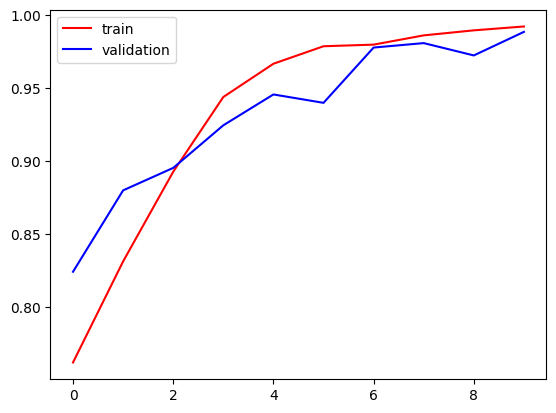

In [79]:
# Getting graph of our model
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

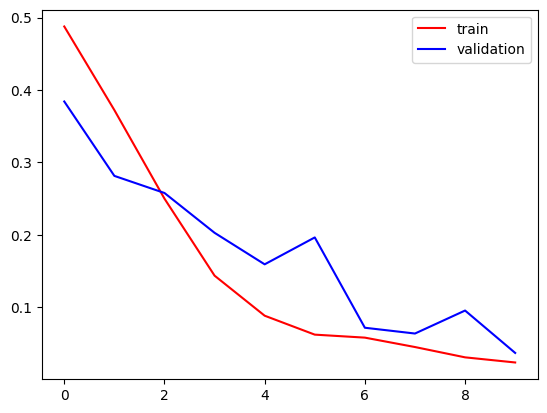

In [80]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

### OBSERVATION

- The validation accuracy is increasing as the number of epochs increases, which means that the model is learning and improving. However, it is still lower than the training accuracy, which means that the model is still overfitting to the training data.

- The final validation accuracy achieved after 10 epochs is approximately 98.47%. This indicates that the model is able to correctly classify around 98.85% of the samples in the validation dataset.

In [81]:
# Saving the model
model_path = '/content/cat_dog_classifier_model'
model.save(model_path)
print("Model saved successfully.")

Model saved successfully.


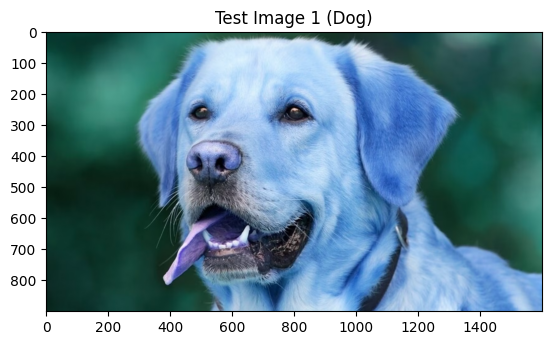

1/1 [==============================] - 0s 33ms/step
Test Image 1 (Dog) Prediction: Dog


In [94]:
import cv2
import matplotlib.pyplot as plt

# Load the test images
test_img1 = cv2.imread('/content/dogg.jpg')
cat_image = cv2.imread('/content/cat.jpg')

plt.imshow(test_img1)
plt.title("Test Image 1 (Dog)")
plt.show()

test_img1 = cv2.resize(test_img1, (256, 256))
test_img1 = test_img1.astype(float) / 255.0
input_image1 = test_img1.reshape((1, 256, 256, 3))

prediction1 = model.predict(input_image1)

threshold = 0.5
if prediction1 >= threshold:
    print("Test Image 1 (Dog) Prediction: Dog")
else:
    print("Test Image 1 (Dog) Prediction: Cat")

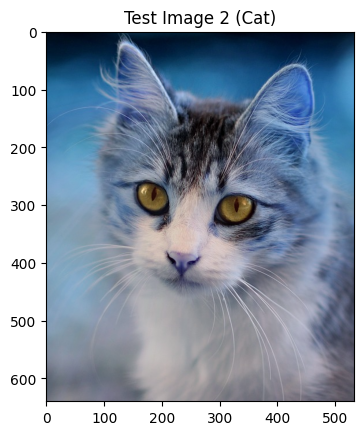

1/1 [==============================] - 0s 56ms/step
Test Image 2 (Cat) Prediction: Cat


In [92]:
plt.imshow(cat_image)
plt.title("Test Image 2 (Cat)")
plt.show()

cat_image = cv2.resize(cat_image, (256, 256))
cat_image = cat_image.astype(float) / 255.0
input_image2 = cat_image.reshape((1, 256, 256, 3))

prediction2 = model.predict(input_image2)

if prediction2 >= threshold:
    print("Test Image 2 (Cat) Prediction: Dog")
else:
    print("Test Image 2 (Cat) Prediction: Cat")

## OBSERVATION

- The model performs well in classifying cat and dog images, achieving a high accuracy of around 98.85% on the validation set.
- However, some overfitting is observed, indicating the need for regularization techniques like dropout or data augmentation to improve generalization.
- The trained model is saved for future use.
- Predictions on new images (one cat and one dog image) are made using the trained model, demonstrating its applicability.